# **Credit Risk Analysis**

In [27]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

In [28]:
# Load dataset
df = pd.read_csv('credit_risk.csv')
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [29]:
# Data Processing (removing the unique identifier)
df = df.drop(columns=['Id'])

In [30]:
# Checking for missing values
df.isnull().sum()

Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [31]:
# Checking the maximum value in the Emp_length column
df['Emp_length'].max()

123.0

In [32]:
# Checking the minimum value in the Emp_length column
df['Emp_length'].min()

0.0

In [34]:
# Find the maximum value in the column
max_value = df['Emp_length'].max()

# Find the next highest value (The next value to the max value)
next_highest_value = df[df['Emp_length'] < max_value]['Emp_length'].max()

# Replace the maximum value with the next highest value
df.loc[df['Emp_length'] == max_value, 'Emp_length'] = next_highest_value

print(df['Emp_length'])

0        38.0
1         5.0
2         1.0
3         4.0
4         8.0
         ... 
32576     1.0
32577     4.0
32578     3.0
32579     5.0
32580     2.0
Name: Emp_length, Length: 32581, dtype: float64


In [35]:
# Filling the missing value in the Emp_length column with the mean value
mean_value = df['Emp_length'].mean()
df['Emp_length'].fillna(mean_value, inplace=True)
df['Emp_length'] = df['Emp_length'].astype(int)

In [36]:
# Filling the missing value in the Rate column with the mean value
mean_value = df['Rate'].mean()
df['Rate'].fillna(mean_value, inplace=True)
df['Rate'] = df['Rate'].astype(float).round(2)

In [37]:
# Checking for missing values
df.isnull().sum()

Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [38]:
df['Intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [39]:
# Define words and their spaced versions
words_to_space = {'HOMEIMPROVEMENT': 'HOME IMPROVEMENT', 'DEBTCONSOLIDATION': 'DEBT CONSOLIDATION'}

# Adding space between specific words
df['Intent'] = df['Intent'].replace(words_to_space, regex=True)



In [40]:
#Confirming if the words have been spaced
df['Intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOME IMPROVEMENT',
       'DEBT CONSOLIDATION'], dtype=object)

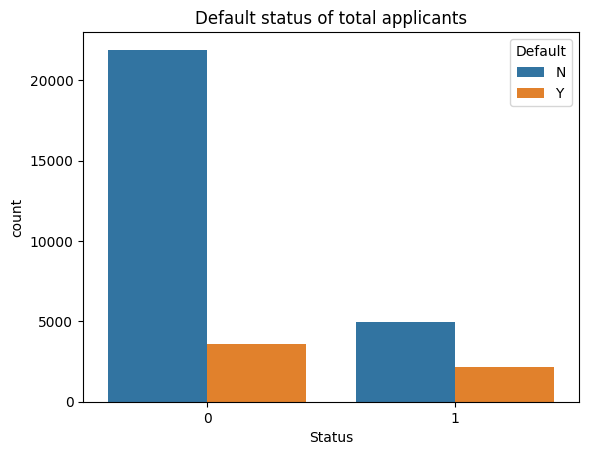

In [41]:
import seaborn as sns
sns.countplot(df, x="Status", hue="Default")
plt.title('Default status of total applicants')
plt.show()

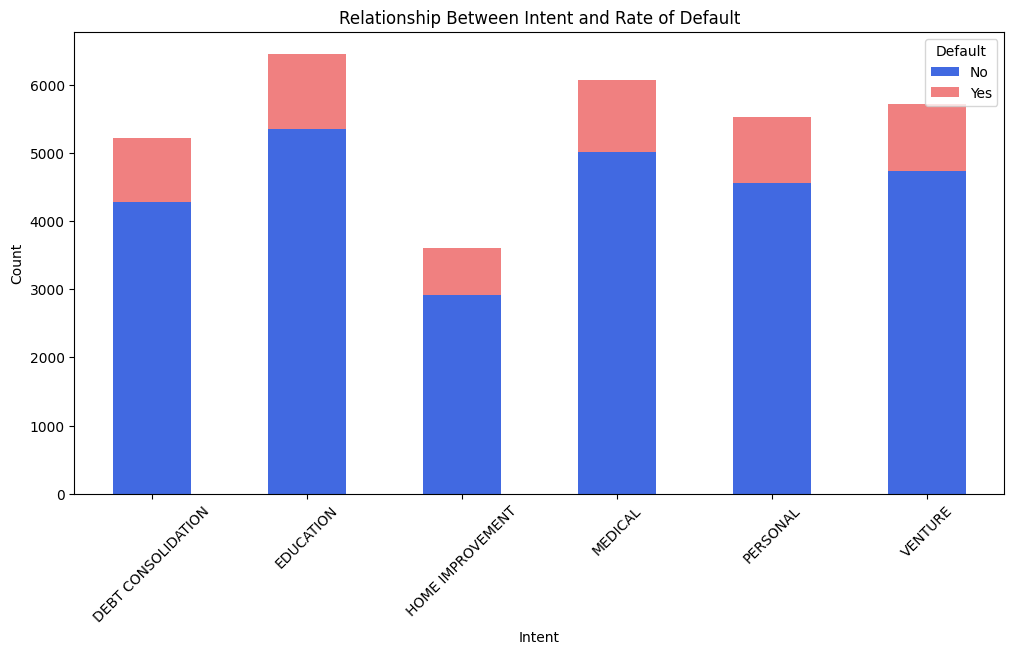

In [42]:
# Count the number of recipes in each category and traffic category
category_counts = df.groupby(['Intent', 'Default']).size().unstack(fill_value=0)

# Create a grouped bar chart
category_counts.plot(kind='bar', stacked=True, color=['royalblue', 'lightcoral'], figsize=(12, 6))
plt.xlabel('Intent')
plt.ylabel('Count')
plt.title('Relationship Between Intent and Rate of Default')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right', labels=['No', 'Yes'])
plt.show()

<ipython-input-43-23ac9e13c47c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


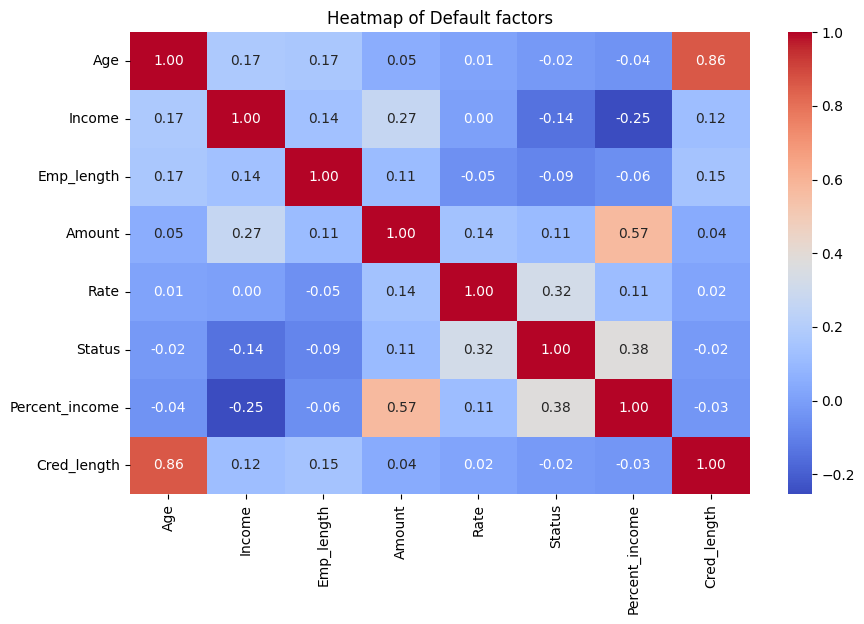

In [43]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Heatmap of Default factors')
plt.show()

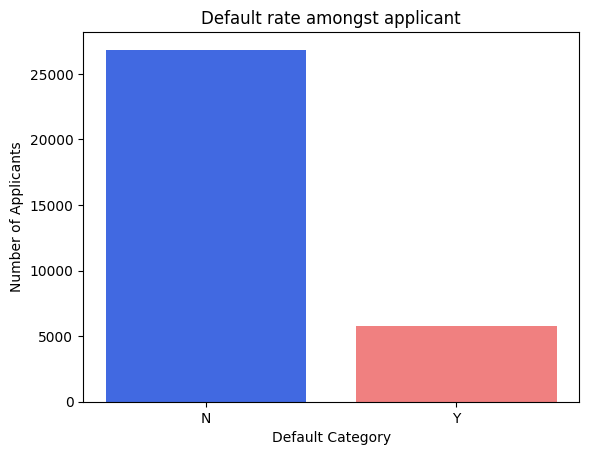

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the number of recipes in each traffic category
default_counts = df['Default'].value_counts()

# Create a bar chart
plt.bar(default_counts.index, default_counts.values, color=['royalblue', 'lightcoral'])
plt.xlabel('Default Category')
plt.ylabel('Number of Applicants')
plt.title('Default rate amongst applicant')
plt.show()

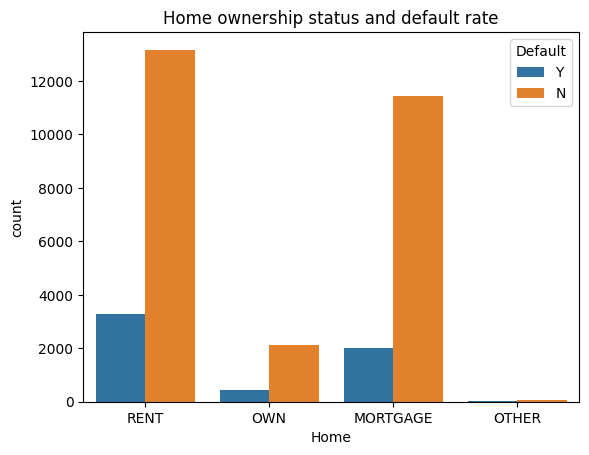

In [23]:
import seaborn as sns
sns.countplot(df, x="Home", hue="Default")
plt.title('Home ownership status and default rate')
plt.show()

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Perform one-hot encoding on categorical variables
df = pd.get_dummies(df, columns=["Home", "Intent", "Default"])

# Separate features and target variable
X = df.drop(columns=["Status"])  # Features
y = df["Status"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9189811262851005
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5072
           1       0.93      0.69      0.79      1445

    accuracy                           0.92      6517
   macro avg       0.92      0.84      0.87      6517
weighted avg       0.92      0.92      0.91      6517



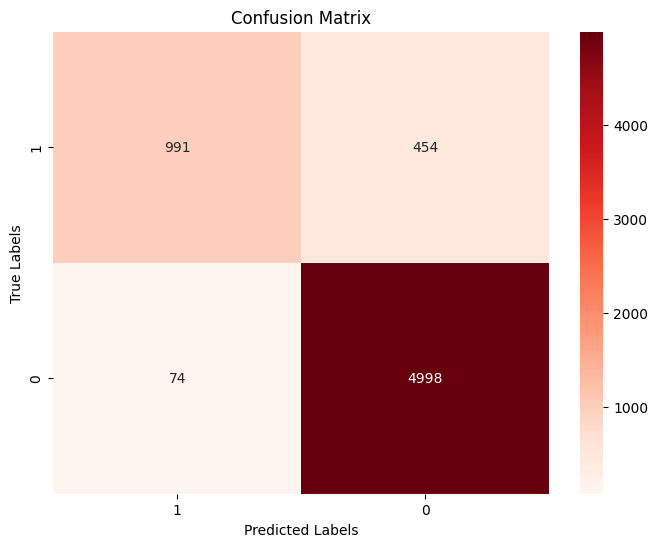

In [25]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=y.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()